In [ ]:
#Packages
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#csv file of adj daily return
act_daily_ret_df=pd.read_csv('act_daily_ret_df.csv')
act_daily_ret_df['Date'] = pd.to_datetime(act_daily_ret_df['Date'])
act_daily_ret_df.set_index('Date', inplace=True)

In [ ]:
act_daily_ret_df

,AAPL,MSFT,GOOG,AMZN,BRK-A,NVDA,V,JPM,UNH,JNJ,...,DIS,CVX,KO,AVGO,PEP,CSCO,WFC,COST,LLY,ADBE
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.015565,0.015420,0.010920,-0.004609,0.004032,-0.010172,0.007775,0.029552,0.034449,0.004192,...,-0.005581,0.026886,0.000702,0.031164,0.007237,0.031328,0.012226,0.004056,0.003081,0.008429
2010-01-05,0.001729,0.000323,-0.004404,0.005900,0.001104,0.014603,-0.011459,0.019370,-0.001586,-0.011596,...,-0.002494,0.007084,-0.012097,0.007423,0.012084,-0.004455,0.027453,-0.003030,-0.017588,0.016446
2010-01-06,-0.015906,-0.006137,-0.025209,-0.018116,0.001404,0.006397,-0.013428,0.005495,0.009848,0.008134,...,-0.005314,0.000125,-0.000355,0.007895,-0.010003,-0.006510,0.001425,0.013000,0.007388,-0.002122
2010-01-07,-0.001849,-0.010400,-0.023280,-0.017013,0.001502,-0.019598,0.009306,0.019809,0.038376,-0.007137,...,0.000314,-0.003767,-0.002485,-0.006267,-0.006356,0.004505,0.036286,-0.004834,-0.005077,-0.019405
2010-01-08,0.006648,0.006897,0.013331,0.027077,0.003000,0.002162,0.002766,-0.002456,-0.009391,0.003437,...,0.001571,0.001765,-0.018509,0.007356,-0.003280,0.005300,-0.009269,-0.007201,-0.007655,-0.005422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.003644,0.004472,0.001317,0.000184,0.000148,0.008163,-0.006148,0.003574,0.002530,0.001906,...,0.011522,0.002411,0.000687,0.014652,-0.001118,0.012189,0.006871,0.001274,0.024765,0.010000
2021-12-27,0.022975,0.023186,0.006263,-0.008178,0.005523,0.044029,0.004663,0.005723,0.008317,0.008440,...,-0.005403,0.020445,0.007386,0.014260,0.009954,0.018304,0.008478,0.023802,0.019443,0.014150
2021-12-28,-0.005767,-0.003504,-0.010914,0.005844,0.005502,-0.020133,0.001930,0.003035,0.006887,0.004008,...,0.015707,-0.001936,0.003922,-0.007831,0.005190,0.001735,-0.007176,0.002077,-0.007112,-0.014402


In [ ]:
#tickers ;ist
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'BRK-A', 'NVDA', 'V', 'JPM', 'UNH',
           'JNJ', 'BAC', 'WMT', 'PG', 'HD', 'MA', 'XOM', 'PFE', 'DIS', 'CVX',
           'KO', 'AVGO', 'PEP', 'CSCO', 'WFC', 'COST', 'LLY', 'ADBE']

In [ ]:
#dataframe for daily portfolio returns
act_daily_port_ret_df = act_daily_ret_df.copy()
act_daily_port_ret_df.drop(columns=tickers, inplace=True)

In [ ]:
# risk free return
risk_free_ret = 0.00045

In [ ]:
# function for adding different portfolios
def add_portfolio(portfolio, weights):
    act_daily_port_ret_df[f'{portfolio} Return'] = act_daily_ret_df.dot(weights)
    act_daily_port_ret_df[f'{portfolio} Cum Prod Return'] = (1 + act_daily_port_ret_df[f'{portfolio} Return']).cumprod()
    portfolio_return=act_daily_port_ret_df[f'{portfolio} Return']
    portfolio_value= act_daily_port_ret_df[f'{portfolio} Cum Prod Return']
#Expected return
    exp_ret = act_daily_port_ret_df[f'{portfolio} Return'].mean()
#standart
    std = act_daily_port_ret_df[f'{portfolio} Return'].std()
#sharpe-ratio
    sharpe_ratio = (exp_ret - risk_free_ret) / std
#Value at risk
    sorted_return = np.sort(portfolio_return)
    var95 =np.percentile(sorted_return, 100 - 95)
#Conditonal VAR
    filtered_returns = sorted_return[sorted_return < var95]
    cvar95 = np.mean(filtered_returns) * 100
#drawdown risk
    peak = np.maximum.accumulate(portfolio_value)
    drawdown = (portfolio_value - peak) / peak
    max_drawdown = np.min(drawdown)*100

    print(portfolio)
    print('Weights:')
    print(weights)
    print(f'Expected Return: {exp_ret:.6f}')
    print(f" maximum drawdown : {max_drawdown:.2f}%")
    print(f" VaR_95: {var95:.2%}")
    print(f"The CVAR_95: {cvar95:.2f}%")
    print(f'Standard Dev   : {std:.6f}')
    print(f'Sharpe Ratio   : {sharpe_ratio:.6f}')

In [ ]:
#Metrics evaluation for each methods
File=['BL_w.csv','DT_w.csv','MVO_w.csv','Q-learning_w.csv','LSTM_w.csv','SVM_W.csv','Policy_gradient.csv','LSTM_w2.csv',]
for name in File:
  weight=pd.read_csv(name)
  A=np.array(weight['0'])
  add_portfolio(f'{name}',A)


BL_w.csv
Weights:
[0.01491 0.03588 0.05416 0.06216 0.0634  0.11542 0.02212 0.04051 0.05152
 0.0443  0.04836 0.03696 0.00734 0.03401 0.0199  0.      0.0327  0.02082
 0.1268  0.01457 0.01003 0.01223 0.00688 0.00921 0.05666 0.01226 0.04692]
Expected Return: 0.000902
 maximum drawdown : -31.55%
 VaR_95: -1.72%
The CVAR_95: -2.81%
Standard Dev   : 0.011703
Sharpe Ratio   : 0.038626
DT_w.csv
Weights:
[0.04196865 0.18743468 0.03627603 0.02907831 0.04569438 0.08633368
 0.01850894 0.02684904 0.01320372 0.02335728 0.02731426 0.03369661
 0.02574617 0.03492935 0.04886075 0.03374778 0.01371473 0.03087932
 0.0122143  0.0258279  0.04275093 0.02048244 0.01957513 0.02520728
 0.01992934 0.02808264 0.04833638]
Expected Return: 0.000937
 maximum drawdown : -30.39%
 VaR_95: -1.71%
The CVAR_95: -2.82%
Standard Dev   : 0.011808
Sharpe Ratio   : 0.041264
MVO_w.csv
Weights:
[0.03947 0.04438 0.03777 0.0481  0.05492 0.03299 0.02526 0.04083 0.0411
 0.03749 0.03904 0.03549 0.02445 0.04782 0.02364 0.02731 0.04757 0

In [1]:
# # # plotting parameters

plt.rcParams['figure.figsize'] = (12,5)


NameError: name 'plt' is not defined

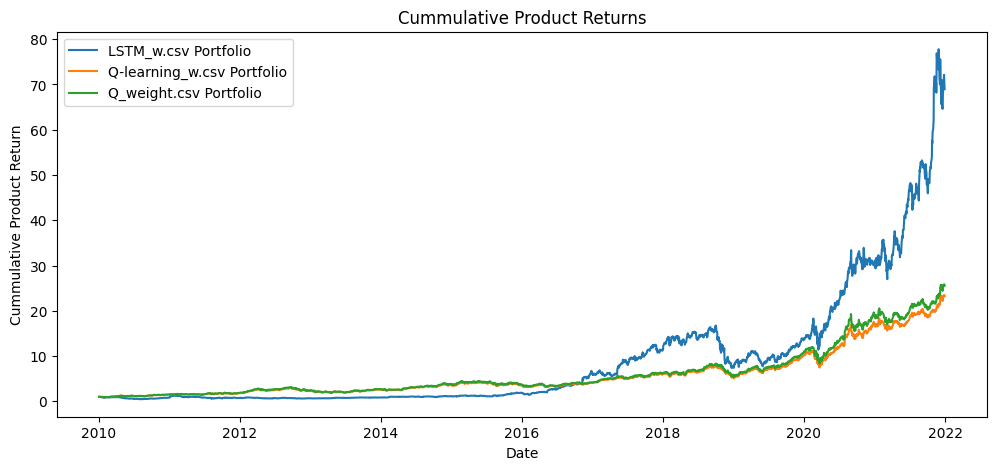

In [ ]:
#Plotting
for name in File:
      plt.plot(act_daily_ret_df.index,act_daily_port_ret_df[f'{name} Cum Prod Return'],label=f'{name} Portfolio')

plt.xlabel('Date')
plt.ylabel('Cummulative Product Return')
plt.title('Cummulative Product Returns')
#plt.ylim(0.9, 2)
plt.legend()
plt.show()

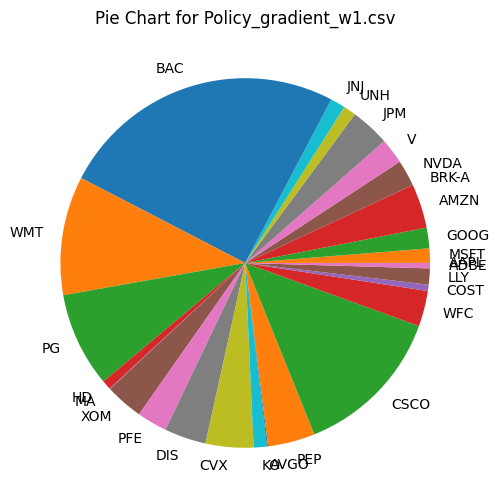

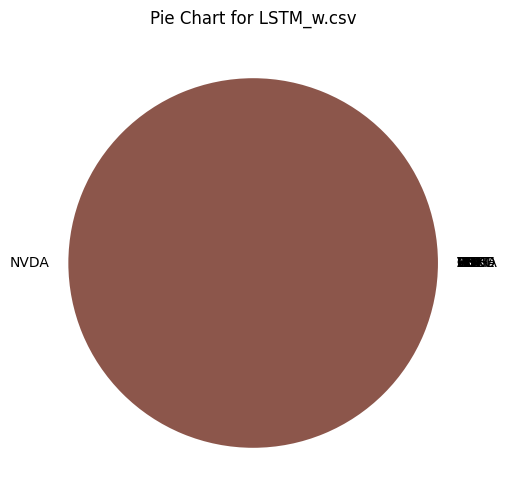

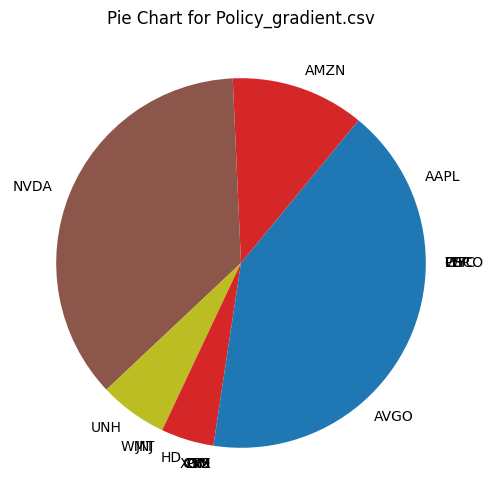

In [ ]:
import matplotlib.pyplot as plt
from collections import OrderedDict

for name in File:  # Assuming `File` is a list containing file names
  # Read the CSV file
  A = pd.read_csv(name)

  # Set index and select the column for the pie chart
  ordered_dict = OrderedDict(zip(A['Unnamed: 0'], A['0']))

  # Create a new figure for each plot
  plt.figure()

  # Create the pie chart
  pd.Series(ordered_dict).plot.pie(figsize=(6,6));

  # Optional: Add a title or labels to the pie chart
  plt.title(f"Pie Chart for {name}")

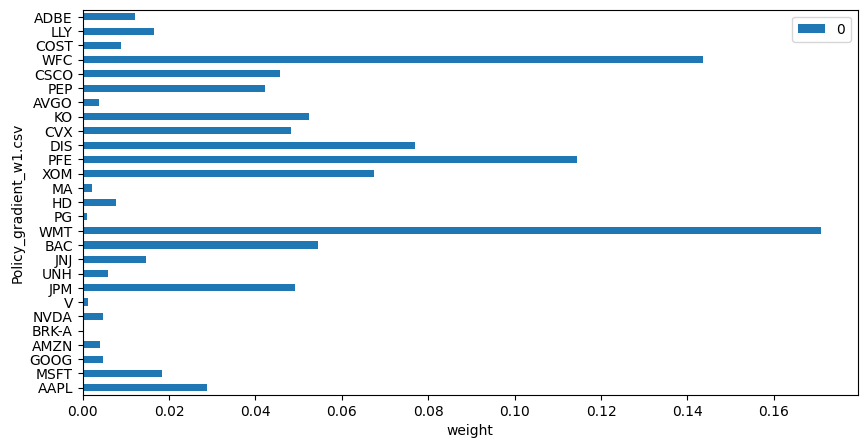

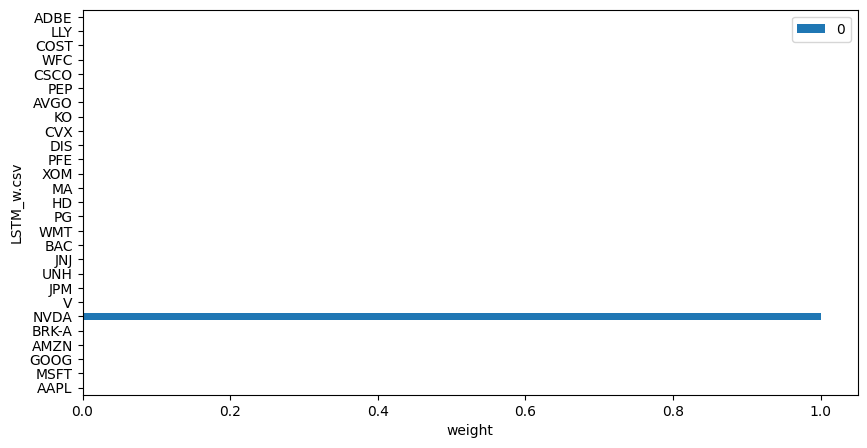

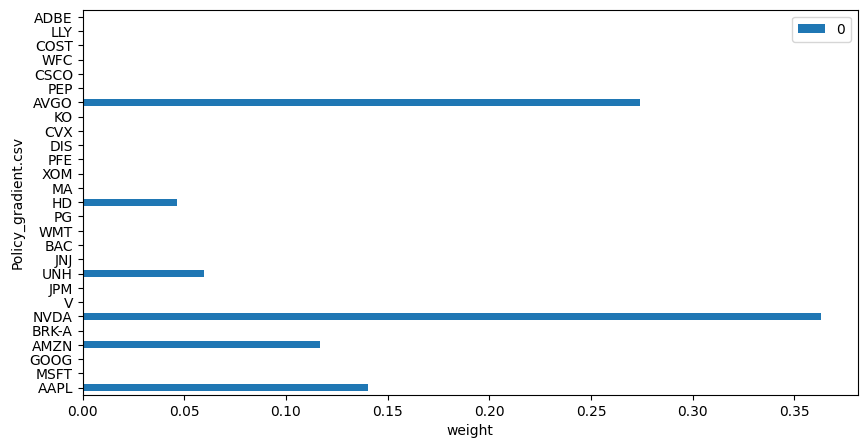

In [ ]:
for name in File:
  B=pd.read_csv(name)
  A=B.set_index('Unnamed: 0')
  A.plot.barh(figsize=(10,5))
  plt.ylabel(name)
  plt.xlabel('weight')
  plt.legend()